<a href="https://colab.research.google.com/github/shivakumarsanugula/Kaggle-Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [6]:
#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.13.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [13]:
## Feature Enginnering --One Hot eNCODONG
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [14]:
# Drop the Geography & Gender from original dataset and concate with new variables
X = X.drop(['Geography','Gender'],axis=True)

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [16]:
X = pd.concat([X,geography,gender],axis=1)

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [18]:
# Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
X_train.shape

(8000, 11)

In [23]:
## Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
## Lets Intialise the ANN

classifer = Sequential()

In [25]:
## Adding the input Layer
classifer.add(Dense(units=11,activation='relu'))

In [26]:
# Adding the First Hidden Layer
classifer.add(Dense(units=7,activation='relu'))

In [27]:
# Adding the second Hidden Layer
classifer.add(Dense(units=6,activation='relu'))

In [28]:
# Adding the output Layer
classifer.add(Dense(1,activation='sigmoid'))

In [29]:
# Learning Rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
# Train the neural network
classifer.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Early Stopping
import tensorflow as tf


early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [32]:
model_history=classifer.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 9s 6ms/step - loss: 0.4320 - accuracy: 0.8151 - val_loss: 0.4051 - val_accuracy: 0.8232
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3846 - accuracy: 0.8462 - val_loss: 0.3867 - val_accuracy: 0.8448
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3627 - accuracy: 0.8535 - val_loss: 0.3803 - val_accuracy: 0.8478
Epoch 4/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3596 - accuracy: 0.8541 - val_loss: 0.3622 - val_accuracy: 0.8508
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3529 - accuracy: 0.8589 - val_loss: 0.3720 - val_accuracy: 0.8444
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3484 - accuracy: 0.8569 - val_loss: 0.3659 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3459 - accuracy: 0.8587 - val_loss: 0.3631 - val_accuracy:

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

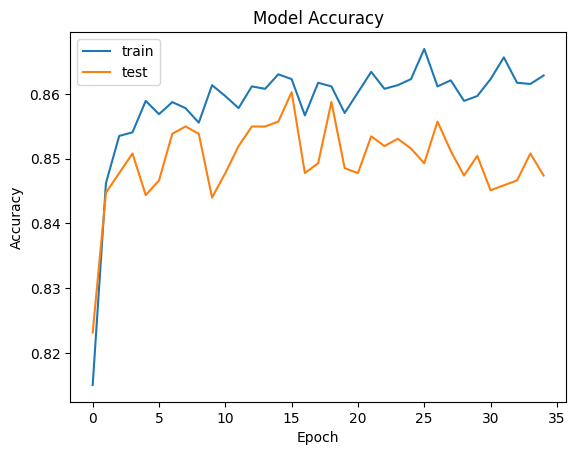

In [34]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

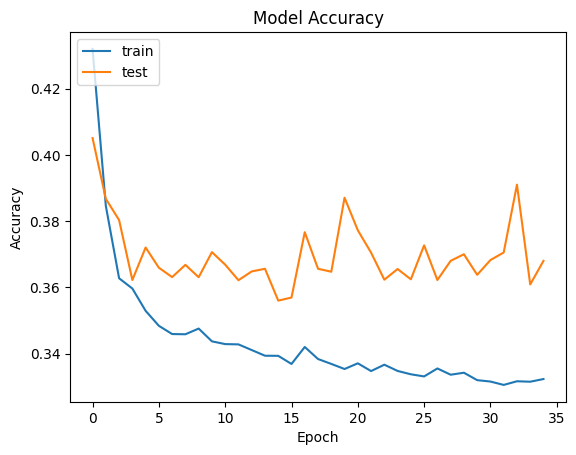

In [35]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [36]:
# Making the predictions and Evaluating the model

# Predecting the Test set results

y_pred = classifer.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [37]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 211,  194]])

In [38]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.865

In [39]:
## Get the weights
classifer.get_weights()

[array([[ 0.8063895 ,  1.9255666 , -1.0048192 , -0.20280339, -0.3346379 ,
         -0.9014542 , -0.09005518, -0.65603554, -0.21704109, -0.34443104,
         -0.47771648],
        [-2.5444849 , -0.65530604, -0.6897694 ,  1.1643531 , -0.5832924 ,
         -1.557104  , -1.0271271 ,  1.8588796 , -1.3792117 , -1.8638045 ,
          1.7787343 ],
        [-0.3651377 ,  0.22091796,  0.9332664 , -0.19773807,  1.2843437 ,
          0.24616504,  0.48725104, -0.08692456, -0.62613535, -0.0105447 ,
          0.21242991],
        [-1.2640733 , -1.7522904 ,  0.17637825,  0.4734117 , -1.9938824 ,
         -0.5340517 , -1.1987958 , -1.0655634 , -0.5950696 , -0.07173911,
         -2.2171497 ],
        [-1.5824574 ,  0.3098244 , -0.3562528 ,  3.1940644 ,  0.01183733,
          1.0712377 , -0.7544568 ,  0.23171854, -1.572879  ,  1.1437141 ,
         -3.4411268 ],
        [ 0.20086578,  0.39375007, -0.15020336, -0.23305202, -0.7863637 ,
         -0.16221876, -0.7889656 ,  0.12395124,  0.21733187, -0.1843849